In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import seaborn as sns

In [3]:
import os

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [4]:
os.chdir(r"C:\Users\super\Downloads\FlightWeather_new")
data=pd.read_csv('FlightWeather2016_17.csv')

In [6]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [7]:
import scipy
import sklearn

In [8]:
data.shape

(1851319, 54)

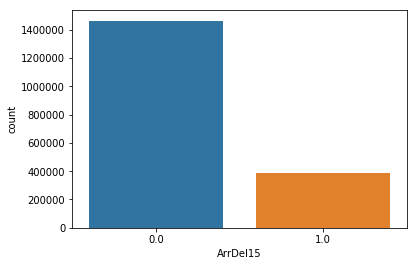

In [6]:
sns.countplot(data['ArrDel15'],label="Count")
plt.show()

In [12]:
data.ArrDelayMinutes.max()

2142.0

In [10]:
data.dtypes

Unnamed: 0           int64
Unnamed: 0_x         int64
Year                 int64
Quarter              int64
Month                int64
DayofMonth           int64
FlightDate          object
DepTime            float64
DepDel15           float64
Origin              object
Dest                object
CRSDepTime           int64
DepDelayMinutes    float64
OriginAirportID      int64
DestAirportID        int64
ArrTime            float64
CRSArrTime           int64
ArrDel15           float64
ArrDelayMinutes    float64
ArrivalDate         object
ArrTime1             int64
DepTime1             int64
Unnamed: 0_y         int64
windspeedKmph_x      int64
DewPointF_x          int64
cloudcover_x         int64
precipMM_x         float64
pressure_x           int64
WindGustKmph_x       int64
visibility_x         int64
weatherCode_x        int64
tempF_x              int64
WindChillF_x         int64
winddirDegree_x      int64
humidity_x           int64
time_x               int64
Airport_x           object
D

In [15]:
from matplotlib import cm
feature_names = data.drop(['ArrDel15','DepDel15','Unnamed: 0','Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0.1',
                             'Date_x','Date_y','FlightDate','ArrivalDate','Airport_x','Airport_y','Origin',
                             'Dest','DepTime','ArrTime','ArrDelayMinutes','ArrTime1','DepTime1','time_x','time_y','DepDelayMinutes'],axis=1)


In [16]:
X = feature_names
y = data['ArrDel15']
# z=  data16['DepDel15']

In [10]:
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=0)
# X_resampled, y_resampled = rus.fit_resample(X, y)


In [20]:
feature_names.columns.tolist()

['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'CRSDepTime',
 'DepDelayMinutes',
 'OriginAirportID',
 'DestAirportID',
 'CRSArrTime',
 'windspeedKmph_x',
 'DewPointF_x',
 'cloudcover_x',
 'precipMM_x',
 'pressure_x',
 'WindGustKmph_x',
 'visibility_x',
 'weatherCode_x',
 'tempF_x',
 'WindChillF_x',
 'winddirDegree_x',
 'humidity_x',
 'windspeedKmph_y',
 'DewPointF_y',
 'cloudcover_y',
 'precipMM_y',
 'pressure_y',
 'WindGustKmph_y',
 'visibility_y',
 'weatherCode_y',
 'tempF_y',
 'WindChillF_y',
 'winddirDegree_y',
 'humidity_y']

In [17]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np
random_state = np.random.RandomState(0)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=random_state)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [25]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# print('Accuracy of Logistic regression classifier on training set: {:.2f}'
#      .format(logreg.score(X_train, y_train)))
# print('Accuracy of Logistic regression classifier on test set: {:.2f}'
#      .format(logreg.score(X_test, y_test)))

C:\Users\super\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KeyboardInterrupt: 

In [136]:
pred=logreg.predict(X_test)

In [42]:
pd.Series(pred)
# pred.tolist()

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        0.0
28        0.0
29        0.0
         ... 
187218    0.0
187219    0.0
187220    0.0
187221    0.0
187222    0.0
187223    0.0
187224    0.0
187225    0.0
187226    0.0
187227    0.0
187228    0.0
187229    0.0
187230    0.0
187231    0.0
187232    0.0
187233    0.0
187234    0.0
187235    0.0
187236    0.0
187237    0.0
187238    0.0
187239    0.0
187240    0.0
187241    0.0
187242    0.0
187243    0.0
187244    0.0
187245    0.0
187246    0.0
187247    0.0
Length: 187248, dtype: float64

In [19]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,pred))

0.8281654250685804


In [138]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[92150, 56555],
       [14993, 23550]], dtype=int64)

In [139]:
print(metrics.precision_score(y_test, pred))

0.2939891392547282


In [140]:
print(metrics.recall_score(y_test,pred))

0.611005889525984


In [141]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.3969725574809521

In [142]:
max(y_test.mean(), 1 - y_test.mean())

0.794160685294369

In [143]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']

In [144]:
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.86      0.62      0.72    148705
     class 1       0.29      0.61      0.40     38543

   micro avg       0.62      0.62      0.62    187248
   macro avg       0.58      0.62      0.56    187248
weighted avg       0.74      0.62      0.65    187248



In [145]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)


In [18]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)

In [19]:
pred=clf.predict(X_test)
print(metrics.accuracy_score(y_test,pred))

NameError: name 'metrics' is not defined

In [20]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']

In [21]:
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.84      0.82      0.83    293130
     class 1       0.36      0.39      0.38     77134

   micro avg       0.73      0.73      0.73    370264
   macro avg       0.60      0.60      0.60    370264
weighted avg       0.74      0.73      0.73    370264



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

In [126]:
pred=knn.predict(X_test)
print(metrics.accuracy_score(y_test,pred))

0.8927304964539007


In [127]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[144935,   3770],
       [ 16316,  22227]], dtype=int64)

In [128]:
print(metrics.precision_score(y_test, pred))

0.8549832673000731


In [129]:
print(metrics.recall_score(y_test,pred))

0.5766805905093013


In [130]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.6887821506042764

In [131]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']

In [132]:
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.90      0.97      0.94    148705
     class 1       0.85      0.58      0.69     38543

   micro avg       0.89      0.89      0.89    187248
   macro avg       0.88      0.78      0.81    187248
weighted avg       0.89      0.89      0.88    187248



In [22]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [23]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [25]:
X_test_new=X_test.values
pred = model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.80      0.99      0.89    293130
     class 1       0.68      0.05      0.09     77134

   micro avg       0.80      0.80      0.80    370264
   macro avg       0.74      0.52      0.49    370264
weighted avg       0.77      0.80      0.72    370264



In [28]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
pred=gnb.predict(X_test)
print(metrics.accuracy_score(y_test,pred))

NameError: name 'metrics' is not defined

In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[129729,  18976],
       [ 27514,  11029]], dtype=int64)

In [34]:
print(metrics.precision_score(y_test, pred))

0.659725072947755


In [35]:
print(metrics.recall_score(y_test,pred))

0.7709051780019187


In [36]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.7109949960243204

In [30]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.82      0.88      0.85    293130
     class 1       0.36      0.26      0.30     77134

   micro avg       0.75      0.75      0.75    370264
   macro avg       0.59      0.57      0.57    370264
weighted avg       0.72      0.75      0.73    370264



AttributeError: 'GaussianNB' object has no attribute 'feature_importances_'

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
ext=ExtraTreesClassifier()
ext.fit(X_train, y_train)

C:\Users\super\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [32]:
from sklearn import metrics
pred=ext.predict(X_test)
print(metrics.accuracy_score(y_test,pred))

0.786727848238014


In [33]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.83      0.92      0.87    293130
     class 1       0.48      0.30      0.37     77134

   micro avg       0.79      0.79      0.79    370264
   macro avg       0.66      0.61      0.62    370264
weighted avg       0.76      0.79      0.77    370264



[0.06999435 0.05617964 0.04540495 0.02780956 0.03377879 0.29574245
 0.01664876 0.01833391 0.03734169 0.01922031 0.01759247 0.01817578
 0.01085342 0.01791685 0.01850994 0.01295814 0.01837038 0.01647339
 0.01665883 0.01736307 0.01775148 0.01967266 0.01661584 0.01668592
 0.01382084 0.01759079 0.01690803 0.01013453 0.01902159 0.0164641
 0.01643717 0.01720111 0.01636929]


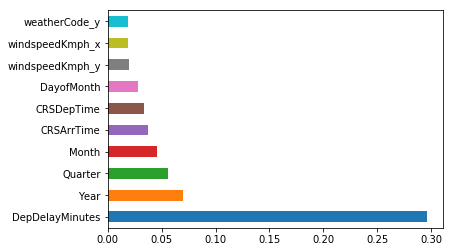

In [48]:
print(ext.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(ext.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [61]:
pred.tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [82]:
df1=data


In [95]:
X_new=X.values
pred=model.predict(X_new)

In [68]:
sLength = len(df1['Year'])
df1['PredDelay'] = pd.Series(np.random.randn(sLength), index=df1.index)

In [96]:
df1['PredDelay']=pred

In [97]:
df1['PredDelay']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
5          1.0
6          0.0
7          0.0
8          0.0
9          0.0
10         0.0
11         0.0
12         1.0
13         0.0
14         0.0
15         0.0
16         0.0
17         0.0
18         0.0
19         0.0
20         0.0
21         1.0
22         0.0
23         0.0
24         0.0
25         0.0
26         0.0
27         0.0
28         0.0
29         0.0
          ... 
1851289    0.0
1851290    0.0
1851291    0.0
1851292    0.0
1851293    0.0
1851294    0.0
1851295    0.0
1851296    0.0
1851297    1.0
1851298    0.0
1851299    0.0
1851300    1.0
1851301    0.0
1851302    0.0
1851303    0.0
1851304    0.0
1851305    1.0
1851306    1.0
1851307    0.0
1851308    0.0
1851309    0.0
1851310    1.0
1851311    0.0
1851312    0.0
1851313    0.0
1851314    0.0
1851315    0.0
1851316    0.0
1851317    0.0
1851318    0.0
Name: PredDelay, Length: 1851319, dtype: float64

In [98]:
os.chdir(r"C:\Users\super\Downloads\FlightWeather_new")
df1.to_csv('Module2ext.csv')